In [66]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.applications import imagenet_utils
from keras import Model
import warnings
from tensorflow.keras.preprocessing import image
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import Image
%matplotlib inline

In [8]:
img=load_img("images/Angelina Jolie/001_fe3347c0.jpg",target_size=(300,300))

NameError: name 'load_img' is not defined

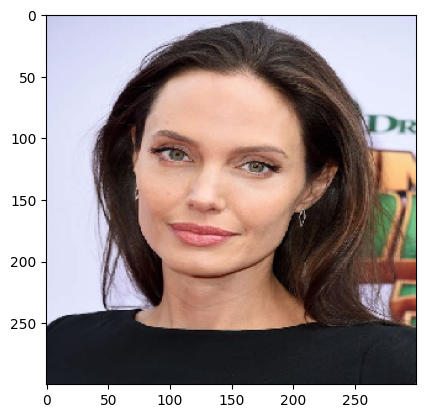

In [4]:
plt.imshow(img)

In [9]:
# Make the val directory
if os.path.isdir('val/Angelina Jolie') is False:
    os.mkdir('val/')
#     os.mkdir('test/')
    li=listdir('train/')
    for i in li:
        os.mkdir(f'val/{i}/')
        tempLi=listdir(f'train/{i}/')
#         temp_len = len(tempLi)
#         list_of_val = random.sample(tempLi, ((15*len(tempLi))//100))
#         for img in list_of_val:
#             shutil.move(f'train/{i}/{img}',f'val/{i}/')
#             del 
        for img in random.sample(tempLi,(15*len(tempLi))//100):
            shutil.move(f'train/{i}/{img}',f'val/{i}/')

if os.path.isdir('test/Angelina Jolie') is False:
    os.mkdir('test/')
    li = listdir('train/')
    for i in li:
        os.mkdir(f'test/{i}/')
        tempLi = listdir(f'train/{i}')
        if i != "Scarlett Johansson":
            for img in random.sample(tempLi,5):
                shutil.move(f'train/{i}/{img}',f'test/{i}/')
        else:
            for img in random.sample(tempLi,10):
                shutil.move(f'train/{i}/{img}',f'test/{i}/')

In [10]:
train_path='train/'
valid_path='val/'
test_path='test/'
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,
                                                                                                                           target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,
                                                                                                                        target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preproce ssing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,
                                                                                                                        target_size=(224,224),batch_size=10, shuffle = False)

Found 1435 images belonging to 17 classes.
Found 267 images belonging to 17 classes.
Found 90 images belonging to 17 classes.


In [49]:
imgs, labels = next(test_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

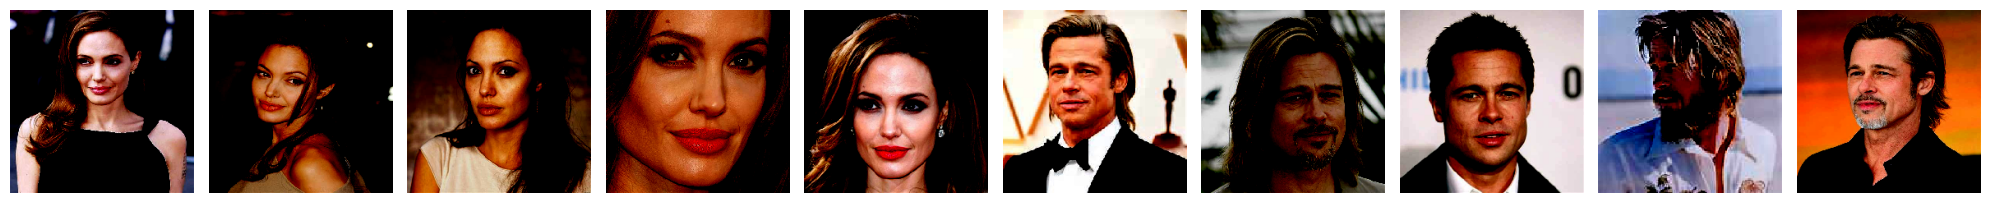

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [50]:
plotImages(imgs)
print(labels)

In [ ]:
model=Sequential([
    Conv2D(filters =64, kernel_size = (4,4), activation='relu',input_shape=(224,224,3)),
    Conv2D(filters =64, kernel_size = (4,4), activation='relu'),
    MaxPool2D(pool_size=(3,3),strides=1),
    Conv2D(filters=128,kernel_size=(4,4),activation='relu'),
    Conv2D(filters =128, kernel_size = (4,4), activation='relu'),
    MaxPool2D(pool_size=(3,3),strides=1),
    Flatten(),
    Dense(units=17,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose=2)
# model.summary()

In [52]:
mobile=keras.applications.mobilenet.MobileNet()

In [54]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [62]:
mobile.layers[89]

In [70]:
newmodel = Sequential()
# Add all layers except the last one
for layer in mobile.layers[:-24]:
    newmodel.add(layer)

In [71]:
# This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of pizza/ non_pizza
for layer in newmodel.layers:
    layer.trainable = False

In [72]:
newmodel.add(Flatten())
newmodel.add(Dense(units=17, activation='softmax'))

In [26]:
newmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)     

 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
          

In [75]:
# Train the fine tuned mobilenet model
newmodel.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
newmodel.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)

Epoch 1/15
144/144 - 49s - loss: 25.3378 - accuracy: 0.3031 - val_loss: 25.5837 - val_accuracy: 0.2622 - 49s/epoch - 342ms/step
Epoch 2/15
144/144 - 18s - loss: 5.5590 - accuracy: 0.7324 - val_loss: 22.8852 - val_accuracy: 0.3371 - 18s/epoch - 123ms/step
Epoch 3/15
144/144 - 19s - loss: 4.8973 - accuracy: 0.7923 - val_loss: 23.5906 - val_accuracy: 0.3258 - 19s/epoch - 129ms/step
Epoch 4/15
144/144 - 19s - loss: 4.5623 - accuracy: 0.8014 - val_loss: 29.7527 - val_accuracy: 0.3371 - 19s/epoch - 131ms/step
Epoch 5/15
144/144 - 19s - loss: 4.0436 - accuracy: 0.8390 - val_loss: 30.6111 - val_accuracy: 0.3146 - 19s/epoch - 130ms/step
Epoch 6/15
144/144 - 19s - loss: 1.5770 - accuracy: 0.9136 - val_loss: 31.7291 - val_accuracy: 0.2884 - 19s/epoch - 132ms/step
Epoch 7/15
144/144 - 19s - loss: 1.4561 - accuracy: 0.9247 - val_loss: 30.8082 - val_accuracy: 0.3558 - 19s/epoch - 131ms/step
Epoch 8/15
144/144 - 19s - loss: 1.7042 - accuracy: 0.9359 - val_loss: 35.2077 - val_accuracy: 0.3558 - 19s/ep

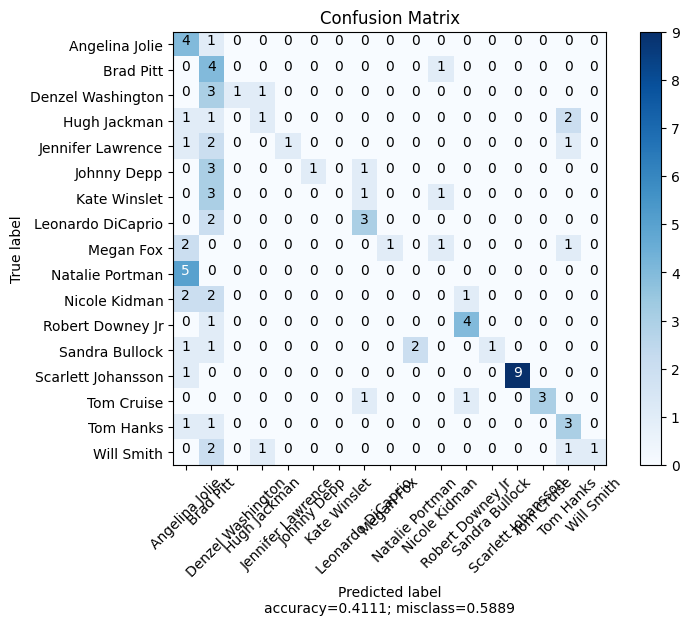

In [76]:
# Prediction
newPred=newmodel.predict(x=test_batches,verbose=0)
newCm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(newPred,axis=1))
newPlotLabels= ['Angelina Jolie','Brad Pitt','Denzel Washington','Hugh Jackman', 'Jennifer Lawrence','Johnny Depp', 
                'Kate Winslet','Leonardo DiCaprio', 'Megan Fox','Natalie Portman','Nicole Kidman','Robert Downey Jr','Sandra Bullock',
                'Scarlett Johansson','Tom Cruise','Tom Hanks','Will Smith']
plot_confusion_matrix(cm=newCm,target_names=newPlotLabels,title='Confusion Matrix',normalize=False)

In [32]:
listdir('test/')

['Tom Cruise',
 'Leonardo DiCaprio',
 'Robert Downey Jr',
 'Hugh Jackman',
 'Brad Pitt',
 'Sandra Bullock',
 'Jennifer Lawrence',
 'Megan Fox',
 'Scarlett Johansson',
 'Will Smith',
 'Denzel Washington',
 'Tom Hanks',
 'Johnny Depp',
 'Kate Winslet',
 'Natalie Portman',
 'Angelina Jolie',
 'Nicole Kidman']